# LSI - Latent Semantic Indexing

Czyli wykrycie w tekście znaczeń poprzez rozkład macierzy TfIdf przy użyciu SVD.

Wymiar danych tekstowych jest równy rozmiarowi słownika. Słowa są od siebie zależne (wystepowanie jak i ich kolejność). Warto zastanowić się nad redukcją wymiarowości.


# Zad
Wiemy że częste słowa to zwykle stopwordsy które warto usunąć. Można usunąć także rzadkie słowa. Proszę spróbować zrobić tak dla wybranej książki z nltk i zobaczyć jak zmniejszyła się wielkość słownika.

#

In [4]:
corpus = ["Romeo and Juliet",
         "Juliet: O happy dagger",
         "Romeo died by dagger",
         "'Live free or die', that’s the New-Hampshire’s motto",
         "Did you know, New-Hampshire is in New-England"]

query = ["dies", "dagger"]

In [8]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

def my_tokenizer(sent):
    tokens = word_tokenize(sent)
    stemmer = PorterStemmer()
    res = [stemmer.stem(word) for word in tokens]
    return res 


vectorizer = TfidfVectorizer(tokenizer=my_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))
vectorizer.fit(corpus)
print(vectorizer.vocabulary_)
tfidf_matrix = vectorizer.transform(corpus).todense()
print(tfidf_matrix)


{'romeo': 10, 'juliet': 5, 'happi': 4, 'dagger': 1, 'die': 2, "'live": 0, 'free': 3, '’': 11, 'new-hampshir': 9, 'motto': 7, 'know': 6, 'new-england': 8}
[[0.         0.         0.         0.         0.         0.70710678
  0.         0.         0.         0.         0.70710678 0.        ]
 [0.         0.53177225 0.         0.         0.659118   0.53177225
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.57735027 0.57735027 0.         0.         0.
  0.         0.         0.         0.         0.57735027 0.        ]
 [0.34706676 0.         0.28001128 0.34706676 0.         0.
  0.         0.34706676 0.         0.28001128 0.         0.69413353]
 [0.         0.         0.         0.         0.         0.
  0.61418897 0.         0.61418897 0.49552379 0.         0.        ]]


# Zad 
Ograniczmy się do 2 pierszych komponentów i narysujmy na płaszczyźnie nasze zdania.

In [11]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) 
svd.fit(tfidf_matrix)

docs_red = svd.transform(tfidf_matrix) 

docs_red # przeanalizujemy podobienstwo

array([[ 0.7837973 , -0.14464289],
       [ 0.71446947, -0.16344513],
       [ 0.76523246,  0.09759731],
       [ 0.17293299,  0.76587814],
       [ 0.0323669 ,  0.71112885]])

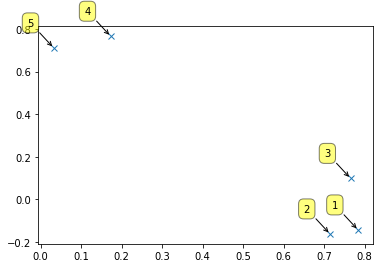

In [12]:
import matplotlib.pyplot as plt


plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

Jeśli nawet dokumenty nie mają wspólnych słów to mogą znaleźć się blisko siebie w zredukowanej przestrzeni (jeśli tylko mają coś wspólnego z trzecim dokumentem).

# Zad 
W zredukowanej przestrzeni można również zaznaczyć query a nawet pojedyncze słowa. Wystarczy potraktować słowo jako dokument i zrzutować. Proszę zaznaczyć słowa.

In [15]:
query = ["dies", "dagger"]
query_red = svd.transform( vectorizer.transform(query).todense() ) 
print(query_red)

[[ 0.28152494  0.23559612]
 [ 0.47190249 -0.02659373]]


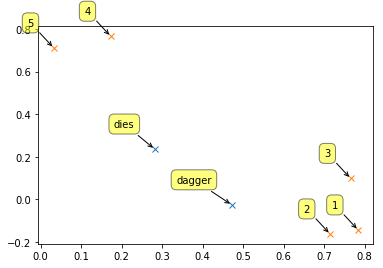

In [25]:

plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = ["dies", "dagger"]
for label, x, y in zip(labels, query_red[:, 0], query_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [26]:
words = list(set(vectorizer.vocabulary_))
print(words)
words_red = svd.transform( vectorizer.transform(words).todense() ) 
print(words_red)

['dagger', "'live", 'new-england', 'free', '’', 'juliet', 'romeo', 'know', 'new-hampshir', 'motto', 'die', 'happi']
[[ 0.47190249 -0.02659373]
 [ 0.03446732  0.23125355]
 [ 0.01141615  0.37998461]
 [ 0.03446732  0.23125355]
 [ 0.06893465  0.46250709]
 [ 0.53646271 -0.16459705]
 [ 0.57199406 -0.03995889]
 [ 0.01141615  0.37998461]
 [ 0.0370185   0.4931431 ]
 [ 0.03446732  0.23125355]
 [ 0.28152494  0.23559612]
 [ 0.27043539 -0.09372401]]


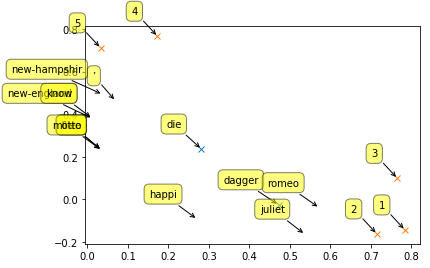

In [27]:

plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = words
for label, x, y in zip(labels, words_red[:, 0], words_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()